In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
datafile="PlantGrowth.csv"
data=pd.read_csv(datafile)

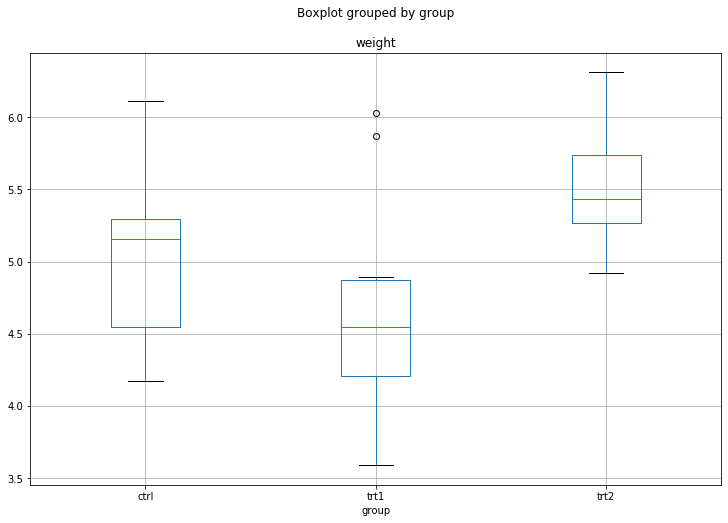

In [8]:
data.boxplot('weight',by='group',figsize=(12,8))
plt.show()

In [9]:
ctrl=data['weight'][data.group=='ctrl']
grps=pd.unique(data.group.values)
d_data={grp:data['weight'][data.group==grp]for grp in grps}
k=len(pd.unique(data.group))
N=len(data.values)
n=data.groupby('group').size()[0]

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod=ols('weight ~ group',data=data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc=MultiComparison(data['weight'],data['group'])
result=mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------
['ctrl' 'trt1' 'trt2']
